#### pickle 형식의 파일 df로 불러오기

In [14]:
import pandas as pd

train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")

In [15]:
ntrain = train.shape[0]
ntest = test.shape[0]
print(ntrain, ntest)

891 418


In [16]:
import pickle
import pandas as pd

with open("titanic_step1_feature_engineering.pickle", "rb") as pickle_file:
    df = pd.read_pickle(pickle_file)

In [17]:
df.drop(["Ticket"], axis=1, inplace=True)


In [18]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial2,Ticket_Num_Cut
0,1,0.0,3,0,3.0,0.0,0,0,0.0,2,0,3.0
1,2,1.0,1,1,4.0,3.0,1,1,2.0,2,1,3.0
2,3,1.0,3,1,3.0,0.0,0,0,1.0,1,2,9.0
3,4,1.0,1,1,4.0,2.0,1,0,2.0,2,3,5.0
4,5,0.0,3,0,4.0,0.0,0,0,0.0,1,3,9.0


#### 현재 그래프를 통해 밝혀진 경향
- Initial이 Mr(남성)인 사람들은 사망률이 높고, Miss(여성), Mrs(여성)는 생존률이 높음
- PClass가 등급이 높을수록 생존률이 높음 
- Age를 봤을 때 상대적으로 어린이들의 생존률이 높음 (2세 이하, 2세 이상 ~ 15세 미만)

#### 높은 생존률을 가진 Feature들의 조합 만들기
- 객석 등급이 높고, 여성(특히, 귀족여성)이며 나이대가 어릴 경우 생존률이 높음

In [19]:
df["HighSurvival"] = 0
df.loc[(df["Pclass"] < 3) & (df["Age"] < 2) & (df["Sex"] == 1), "HighSurvival"] = 6
df.loc[(df["Initial"] == 4), "HighSurvival"] = 5
df.loc[(df["Pclass"] < 3) & (df["Age"] == 2) & (df["Sex"] == 1), "HighSurvival"] = 4
df.loc[(df["Pclass"] < 3) & (df["Initial"] == 1), "HighSurvival"] = 3
df.loc[(df["Pclass"] == 1) & (df["Initial"] == 2), "HighSurvival"] = 2
df.loc[(df["Age"] == 0) , "HighSurvival"] = 1

In [20]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial2,Ticket_Num_Cut,HighSurvival
0,1,0.0,3,0,3.0,0.0,0,0,0.0,2,0,3.0,0
1,2,1.0,1,1,4.0,3.0,1,1,2.0,2,1,3.0,2
2,3,1.0,3,1,3.0,0.0,0,0,1.0,1,2,9.0,0
3,4,1.0,1,1,4.0,2.0,1,0,2.0,2,3,5.0,2
4,5,0.0,3,0,4.0,0.0,0,0,0.0,1,3,9.0,0


In [21]:
train = df[:ntrain]

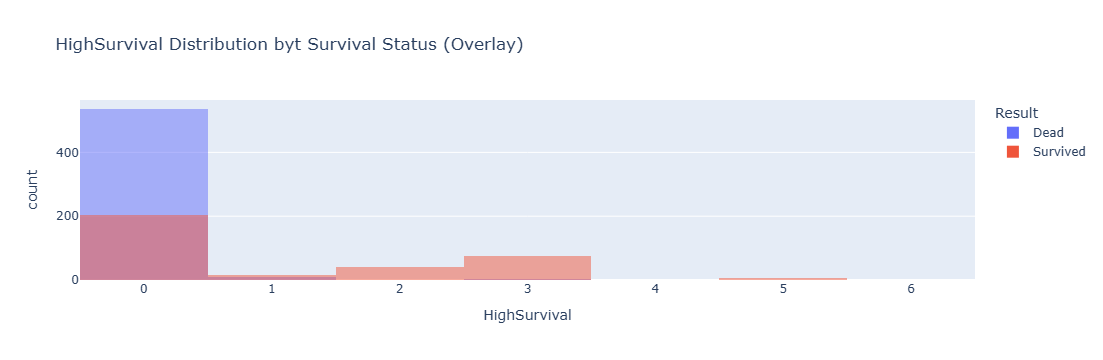

In [29]:
import plotly.express as px

train_high = train.copy()


train_high["Result"] = train_high["Survived"].map({0: "Dead", 1: "Survived"})

fig = px.histogram(
    train_high,
    x="HighSurvival",
    color="Result",
    barmode="overlay",
    title="HighSurvival Distribution byt Survival Status (Overlay)"
)
fig.show()

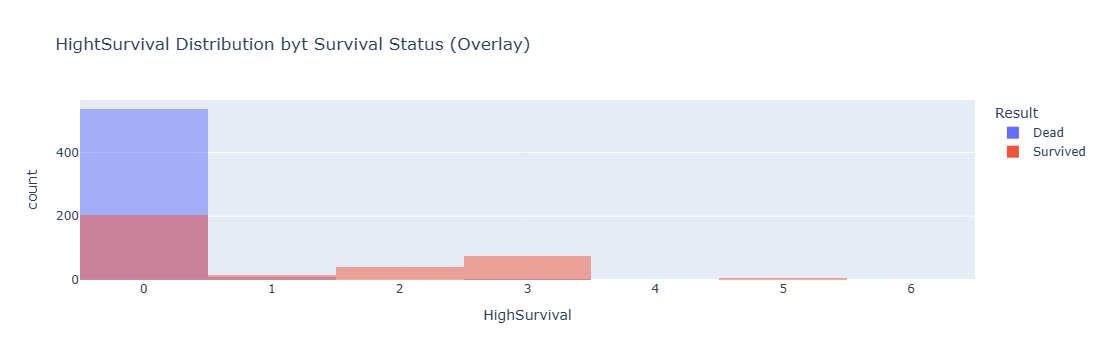

#### 낮은 생존률을 가진 Feature들의 조합 만들기
- 객석 등급이 낮고, 청년 또는 노인 남성이며, 홀로 탑승했을 때 생존률이 낮음

In [27]:
df["LowSurvival"] = 0
df.loc[(df["Sex"] == 1) & (df["Family"] == 1), "LowSurvival"] = 1
df.loc[(df["Sex"] == 1) & (df["Family"] == 1) & (df["Pclass"] == 3), "LowSurvival"] = 2

In [28]:
train = df[:ntrain]
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial2,Ticket_Num_Cut,HighSurvival,LowSurvival
0,1,0.0,3,0,3.0,0.0,0,0,0.0,2,0,3.0,0,0
1,2,1.0,1,1,4.0,3.0,1,1,2.0,2,1,3.0,2,0
2,3,1.0,3,1,3.0,0.0,0,0,1.0,1,2,9.0,0,2
3,4,1.0,1,1,4.0,2.0,1,0,2.0,2,3,5.0,2,0
4,5,0.0,3,0,4.0,0.0,0,0,0.0,1,3,9.0,0,0


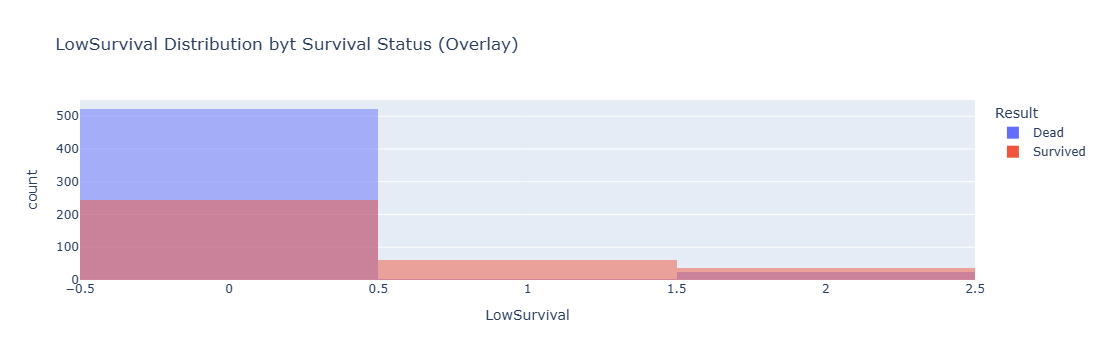

In [30]:
import plotly.express as px

train_low = train.copy()


train_low["Result"] = train_low["Survived"].map({0: "Dead", 1: "Survived"})

fig = px.histogram(
    train_low,
    x="LowSurvival",
    color="Result",
    barmode="overlay",
    title="LowSurvival Distribution byt Survival Status (Overlay)"
)
fig.show()